![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


filename_features = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/features.txt"
filename_labels = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "/Users/rayssaathayde/Library/CloudStorage/OneDrive-Pessoal/Ciências de Dados/EBAC/27/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#").squeeze('columns')
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id']).squeeze('columns')
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id']).squeeze('columns')
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

### Análise PCA padronizada

In [34]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
X_test_pad  = pd.DataFrame(X_test).apply(padroniza, axis=0)
X_train_pad.head()

CPU times: user 159 ms, sys: 36 ms, total: 195 ms
Wall time: 202 ms


,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
0,0.200628,-0.063678,-0.419600,-0.868755,-0.939377,-0.737479,-0.859758,-0.938955,-0.766385,-0.855978,...,-0.795305,0.025958,-0.276380,-0.360579,0.062935,-0.778374,-0.026079,-0.687172,0.407918,-0.007567
1,0.055944,0.031484,-0.253891,-0.875366,-0.923839,-0.849247,-0.868472,-0.921936,-0.848870,-0.871300,...,0.130605,-0.897296,-0.767938,0.133002,-0.021460,-1.218722,1.484369,-0.694091,0.409089,0.007875
2,0.073510,-0.043414,-0.076289,-0.868980,-0.907698,-0.893724,-0.863078,-0.898793,-0.896640,-0.863264,...,1.152257,-0.260860,-0.438286,-0.377815,0.391949,0.151197,1.704085,-0.702191,0.410260,0.026501
3,0.066691,-0.208407,-0.249695,-0.870566,-0.939959,-0.921743,-0.864445,-0.938060,-0.925216,-0.863264,...,1.112694,0.591005,0.463123,-0.135016,-0.033635,1.037781,-1.002951,-0.701636,0.414622,0.031712
4,0.030467,0.027585,-0.109840,-0.875128,-0.934815,-0.921281,-0.867325,-0.931726,-0.927965,-0.870201,...,-0.149567,-0.138505,-0.240296,0.340383,0.268468,1.125841,-1.276196,-0.700104,0.425434,0.045222


In [19]:
# Aplica o PCA e treina com os dados padronizados
prcomp_pad = PCA().fit(X_train_pad)
n_componentes = X_train_pad.shape[1]

# Transforma os dados e criar df com os componentes principais gerados na PCA
componentes_pad = prcomp_pad.transform(X_train_pad)

nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

df_cp_pad = pd.DataFrame(data = componentes_pad
             , columns = nomes_pca)

In [20]:
#561 componentes principais criadas
df_cp_pad.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP552,CP553,CP554,CP555,CP556,CP557,CP558,CP559,CP560,CP561
0,-16.137446,2.151878,3.144566,-0.272446,6.798476,-4.249105,2.936959,-4.905079,-0.775462,-3.627490,...,2.375090e-16,5.100779e-16,-3.064021e-16,2.114549e-16,8.584459e-16,3.776799e-16,-4.653595e-16,3.414351e-16,-1.427435e-15,-5.578164e-15
1,-15.295154,1.387049,-0.682175,2.813486,4.265880,-2.055523,0.011204,-1.845860,0.492513,-0.180162,...,-5.134754e-16,-1.037960e-16,-4.143437e-16,1.819016e-16,-5.369285e-16,-5.335056e-16,2.954309e-16,-2.493561e-16,6.642354e-16,1.519091e-15
2,-15.135989,2.473183,-1.756521,3.717722,4.181273,-1.357425,0.072942,-1.388094,0.539717,-0.671666,...,-2.947901e-16,2.497449e-17,-3.149040e-17,4.350569e-16,-4.420742e-17,2.695812e-17,3.617269e-16,-1.378791e-16,3.443951e-15,4.492999e-15
3,-15.349840,3.915414,-1.790201,2.567347,3.205621,-0.942880,0.530700,-1.832060,1.071444,-1.496887,...,3.014067e-16,7.523815e-16,-2.355650e-16,-7.250265e-17,1.823602e-17,2.836464e-16,1.811052e-16,-8.072093e-17,1.882994e-15,2.105564e-16
4,-15.543756,4.598424,-2.188433,2.897381,3.079941,-1.061386,-1.048520,-0.816877,0.600022,1.118799,...,-1.659091e-16,-1.933995e-16,-2.311625e-18,2.890672e-16,-4.228594e-16,2.005302e-16,2.001674e-16,-1.561329e-16,2.428082e-15,4.178393e-15


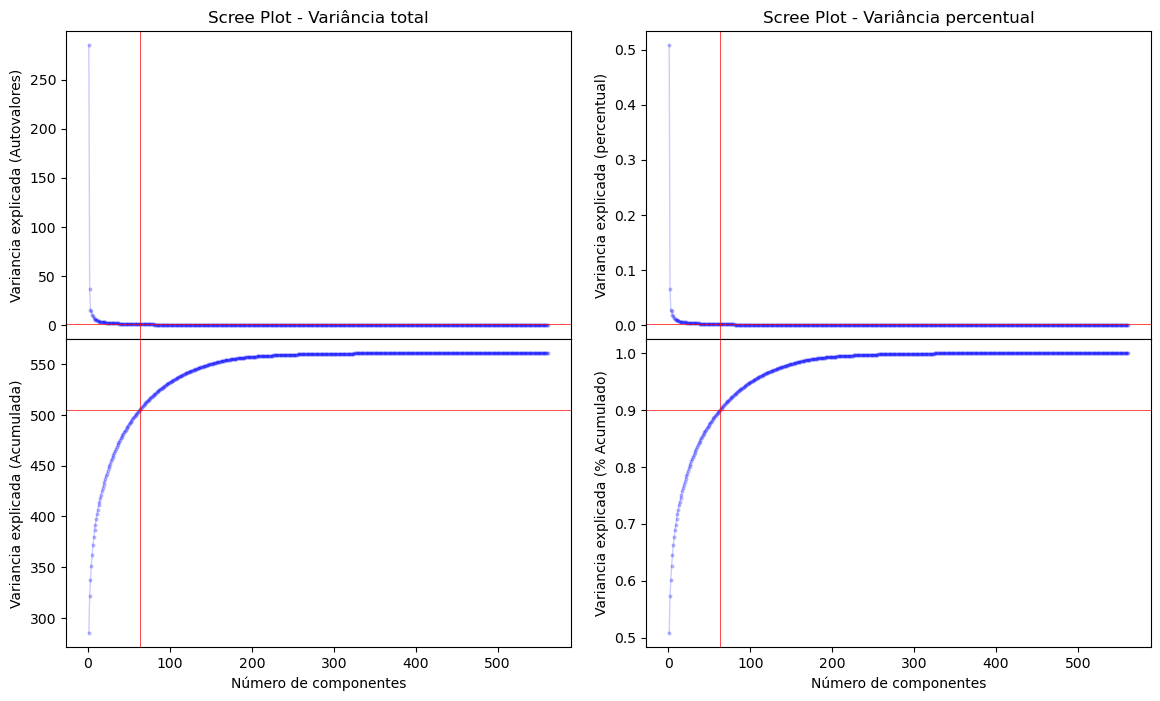

In [21]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

# Número de componentes pelo critério
varexplicada = .90  # Define a variância explicada desejada
ncomp_criterio_pad = (prcomp_pad.explained_variance_ratio_.cumsum() < varexplicada).sum() + 1
# Calcula o número de componentes necessário para atingir a variância explicada desejada

#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(prcomp_pad.n_components_) + 1
ax[0,0].plot(num_componentes, prcomp_pad.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd_componentes
ax[1,0].plot(num_componentes, prcomp_pad.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

# Gráfico da variância percentual por qtd_componentes
ax[0,1].plot(num_componentes, prcomp_pad.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

# Gráfico da variância percentual acumulada por qtd_componentes
ax[1,1].plot(num_componentes, prcomp_pad.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio_pad, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio_pad, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio_pad, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio_pad, color = 'r', linestyle = '-', linewidth=.5)


# linhas horizontais
ax[0,0].axhline(y = prcomp_pad.explained_variance_[ncomp_criterio_pad-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = prcomp_pad.explained_variance_.cumsum()[ncomp_criterio_pad-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = prcomp_pad.explained_variance_ratio_[ncomp_criterio_pad-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = prcomp_pad.explained_variance_ratio_.cumsum()[ncomp_criterio_pad-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [26]:
print(f'Para explicar 90% da variância com a padronização das variáveis, são necessárias {ncomp_criterio_pad} componentes.')

criterio_autovalor = (prcomp_pad.explained_variance_ratio_ > 1 / prcomp_pad.n_components_).sum()
print(f'Para o critério de autovalor > 1, são necessárias {criterio_autovalor} componentes.')

Para explicar 90% da variância com a padronização das variáveis, são necessárias 63 componentes.
Para o critério de autovalor > 1, são necessárias 61 componentes.


### Análise PCA não padronizada

In [28]:
# Aplica o PCA e treina com os dados não padronizados
prcomp = PCA().fit(X_train)
n_componentes = X_train.shape[1]

# Transforma os dados e criar df com os componentes principais gerados na PCA
componentes = prcomp.transform(X_train)

nomes_pca = ['CP'+str(x+1) for x in list(range(n_componentes))]

df_cp = pd.DataFrame(data = componentes
             , columns = nomes_pca)

In [29]:
#561 componentes principais criadas
df_cp.head()

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,...,CP552,CP553,CP554,CP555,CP556,CP557,CP558,CP559,CP560,CP561
0,-5.520280,-0.290278,-1.529929,1.333242,1.425089,-0.194708,0.577454,0.691490,-1.222865,-0.363414,...,-1.187548e-16,-2.377416e-16,1.566552e-16,-1.081545e-16,-1.136607e-16,-1.165125e-17,-3.471226e-15,1.080203e-16,2.007624e-16,1.780850e-16
1,-5.535350,-0.082530,-1.924804,0.671273,0.671260,0.735144,-0.616908,-0.771714,-0.615496,-0.895525,...,-1.643019e-16,-6.966704e-17,5.846981e-18,4.766019e-17,-1.012440e-16,1.253539e-16,1.177060e-15,8.850017e-17,1.586858e-16,-4.063392e-17
2,-5.474988,0.287387,-2.144642,0.531806,0.207824,-0.037772,0.057628,0.093917,-0.063147,-0.216898,...,-2.648808e-17,-6.501885e-18,-3.666274e-17,-2.358143e-17,-1.886662e-16,-1.381550e-16,-2.697434e-15,1.152164e-16,6.674979e-17,1.621640e-17
3,-5.677232,0.897031,-2.018220,0.157125,0.759085,1.079547,-0.267805,-0.731391,0.281296,0.466269,...,-8.709554e-17,-7.157270e-18,9.492600e-17,-5.735280e-17,-1.067682e-16,1.395318e-16,8.082995e-16,2.060127e-17,3.664112e-17,-5.752069e-17
4,-5.748749,1.162952,-2.139533,0.207823,0.473090,0.463035,-0.152227,-0.107509,0.289819,0.539206,...,-2.197280e-16,-7.759228e-17,8.974599e-17,-5.731442e-17,-4.008033e-17,3.292177e-16,6.755346e-16,-5.650772e-17,1.362947e-16,-6.428145e-17


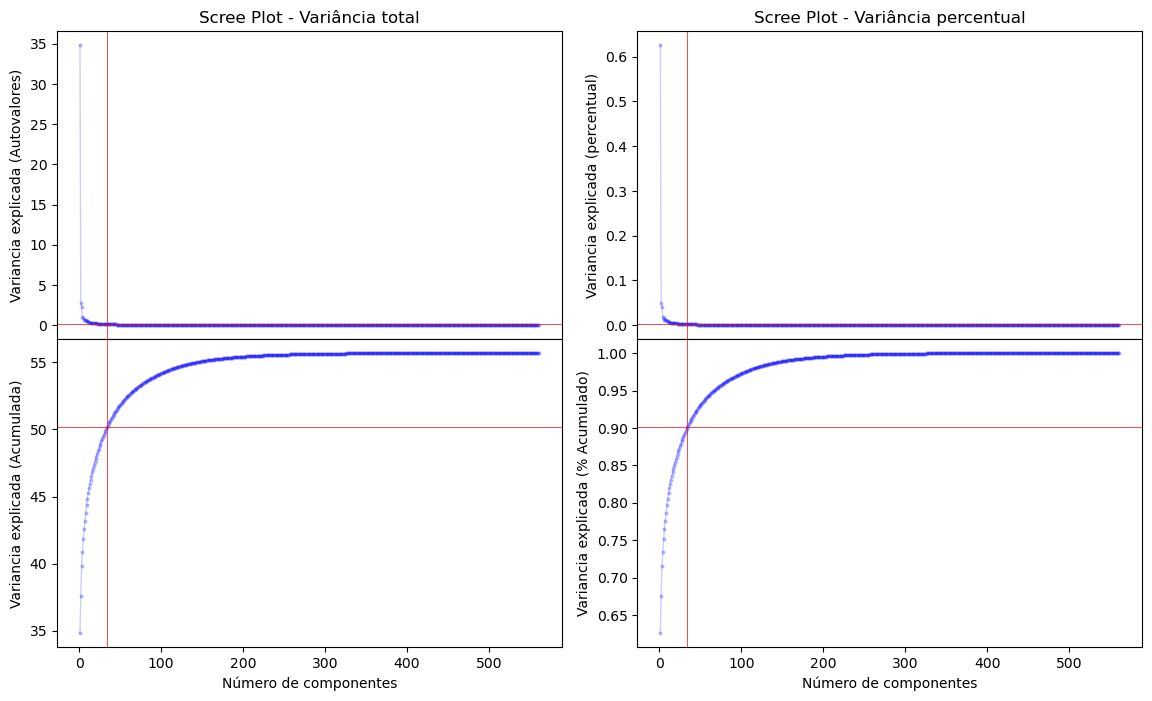

In [30]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

# Número de componentes pelo critério
varexplicada = .90  # Define a variância explicada desejada
ncomp_criterio = (prcomp.explained_variance_ratio_.cumsum() < varexplicada).sum() + 1
# Calcula o número de componentes necessário para atingir a variância explicada desejada

#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(prcomp.n_components_) + 1
ax[0,0].plot(num_componentes, prcomp.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd_componentes
ax[1,0].plot(num_componentes, prcomp.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

# Gráfico da variância percentual por qtd_componentes
ax[0,1].plot(num_componentes, prcomp.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

# Gráfico da variância percentual acumulada por qtd_componentes
ax[1,1].plot(num_componentes, prcomp.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# Linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio, color = 'r', linestyle = '-', linewidth=.5)


# linhas horizontais
ax[0,0].axhline(y = prcomp.explained_variance_[ncomp_criterio-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = prcomp.explained_variance_.cumsum()[ncomp_criterio-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = prcomp.explained_variance_ratio_[ncomp_criterio-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = prcomp.explained_variance_ratio_.cumsum()[ncomp_criterio-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()

In [32]:
print(f'Para explicar 90% da variância sem a padronização das variáveis, são necessárias {ncomp_criterio} componentes.')

Para explicar 90% da variância sem a padronização das variáveis, são necessárias 34 componentes.


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

### Árvore com dados padronizados

In [35]:
%%time

# Aplica o PCA com 10 componentes aos dados padronizados de treinamento
princomp_pad = PCA(n_components=10).fit(X_train_pad)

# Transforma os dados de treinamento e teste utilizando as componentes principais encontradas pelo PCA
pc_treino_pad = princomp_pad.transform(X_train_pad)
pc_teste_pad  = princomp_pad.transform(X_test_pad)

# Cria árvore de decisão com ccp_alpha=0.001 e treina-a com os dados de treinamento transformados
clf_pad = DecisionTreeClassifier(ccp_alpha= 0.001, random_state=100)

clf_pad = clf_pad.fit(pc_treino_pad, y_train)

# Avaliação da acurácia do classificador nos dados de treinamento
print(f'Acurácia na base de treinamento: {round(clf.score(pc_treino_pad, y_train), 2)}')

# Avaliação da acurácia do classificador nos dados de teste
print(f'Acurácia na base de teste: {round(clf.score(pc_teste_pad, y_test), 2)}')

Acurácia na base de treinamento: 0.86
Acurácia na base de teste: 0.77
CPU times: user 2.04 s, sys: 630 ms, total: 2.67 s
Wall time: 425 ms


### Árvore com dados não padronizados

In [36]:
%%time

# Aplica o PCA com 10 componentes aos dados não padronizados de treinamento
princomp = PCA(n_components=10).fit(X_train)

# Transforma os dados de treinamento e teste utilizando as componentes principais encontradas pelo PCA
pc_treino = princomp.transform(X_train)
pc_teste  = princomp.transform(X_test)

# Cria árvore de decisão com ccp_alpha=0.001 e treina-a com os dados de treinamento transformados
clf = DecisionTreeClassifier(ccp_alpha= 0.001, random_state=100)

clf = clf.fit(pc_treino, y_train)

# Avaliação da acurácia do classificador nos dados de treinamento
print(f'Acurácia na base de treinamento: {round(clf.score(pc_treino, y_train), 2)}')

# Avaliação da acurácia do classificador nos dados de teste
print(f'Acurácia na base de teste: {round(clf.score(pc_teste, y_test), 2)}')

Acurácia na base de treinamento: 0.89
Acurácia na base de teste: 0.82
CPU times: user 1.57 s, sys: 694 ms, total: 2.27 s
Wall time: 323 ms


### Comparação de Classificadores por meio de Matrizes de Confusão e Acurácia

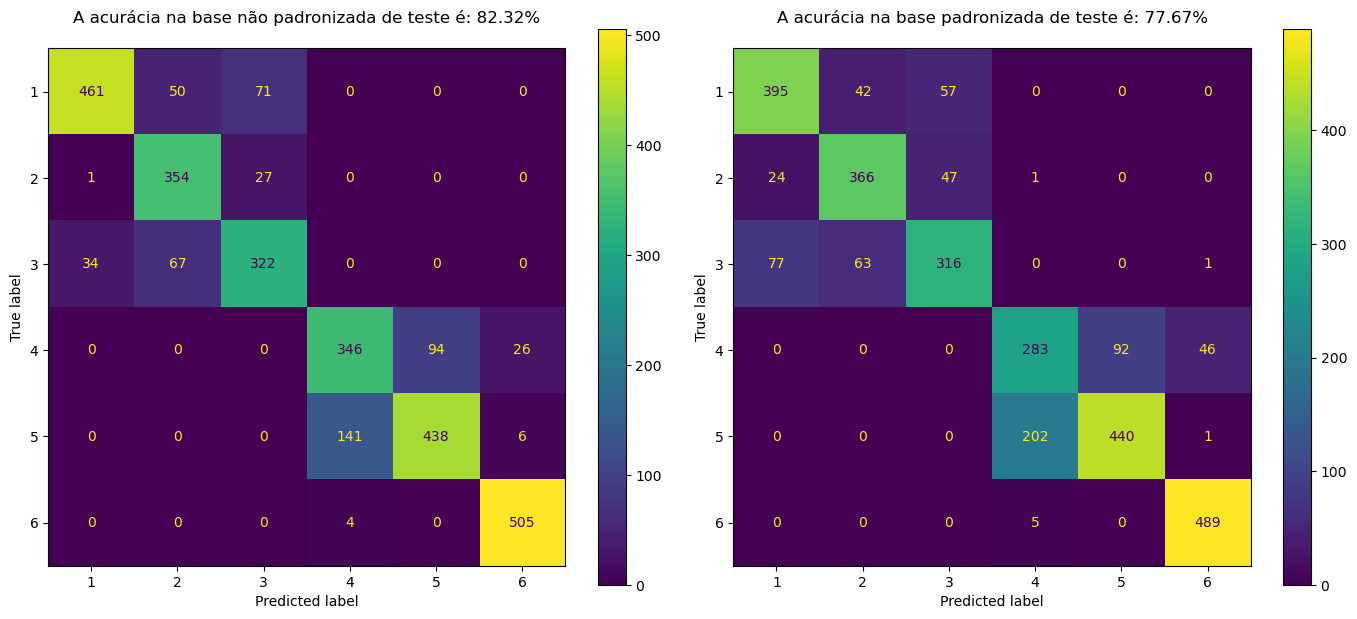

In [38]:
# Realiza a previsão dos dados
y_pred = clf.predict(pc_teste)
y_pred_pad = clf_pad.predict(pc_teste_pad)

# Cria uma figura com 1 linha e 2 colunas e define o tamanho da figura
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Configura o título do primeiro subgráfico com a acurácia na base não padronizada de teste
ax[0].set_title(f'A acurácia na base não padronizada de teste é: {accuracy_score(y_pred, y_test) * 100:.2f}%\n')

# Plota a matriz de confusão do primeiro subgráfico
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, ax=ax[0])

# Configura o título do segundo subgráfico com a acurácia na base padronizada de teste
ax[1].set_title(f'A acurácia na base padronizada de teste é: {accuracy_score(y_pred_pad, y_test) * 100:.2f}%\n')

# Plota a matriz de confusão do segundo subgráfico
ConfusionMatrixDisplay.from_predictions(y_pred_pad, y_test, ax=ax[1])

# Ajusta o layout dos subgráficos para evitar sobreposições
plt.tight_layout()

# Exibe o gráfico
plt.show()